- 아래는 chain이 가질 수 있는(묶을 수 있는) 구성요소(component)들이다.
- 이전 강의에서 Prompt, LLM(ChatModel), OutputParser 는 이미 사용해봤다.

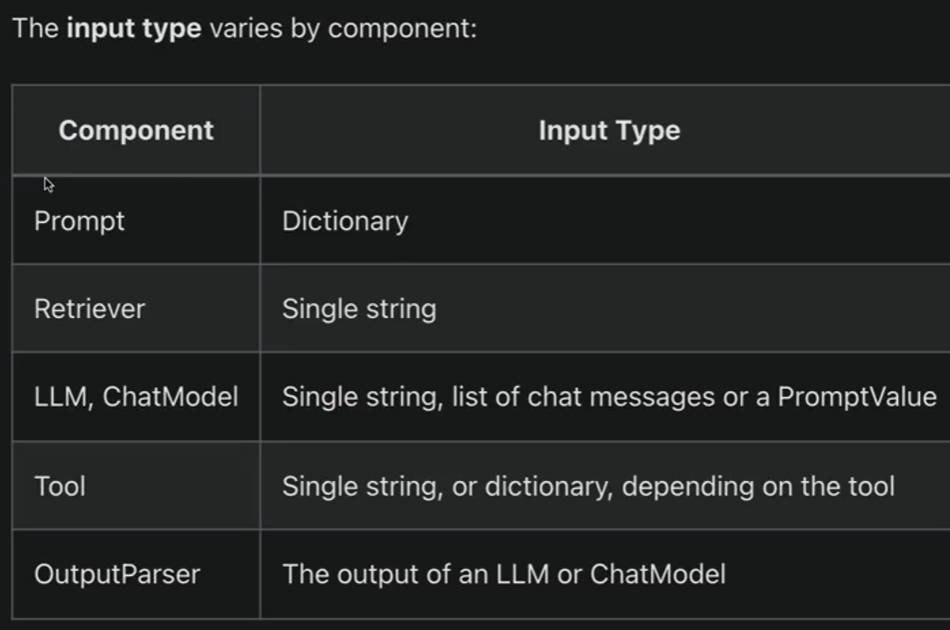

- 아래는 각 Component의 Output type(출력 타입 = return type)이다.

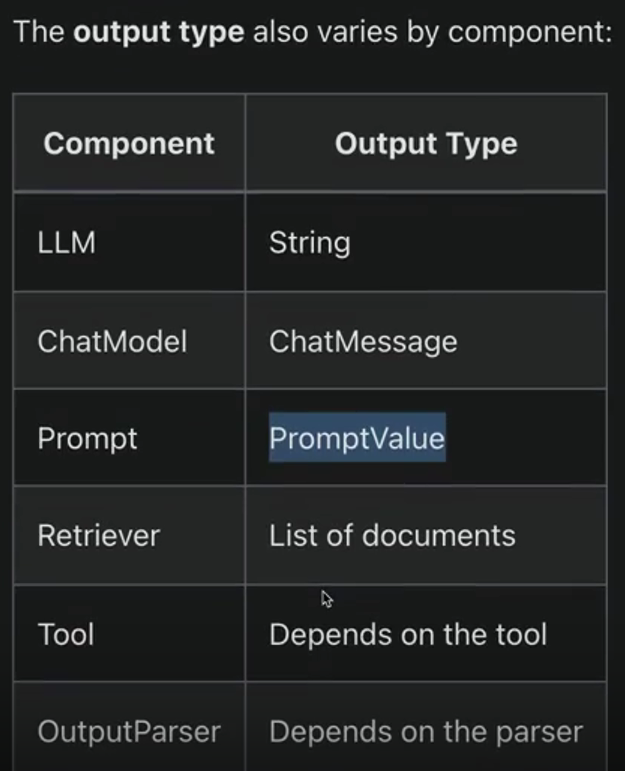

In [3]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.callbacks import StreamingStdOutCallbackHandler # 답변 실시간 생성

chat = ChatOpenAI(temperature=0.1, streaming=True, callbacks=[StreamingStdOutCallbackHandler()])

### chef_chain

In [4]:
chef_prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a world-class international chef. You create easy to followrecipies for any type of cuisine with easy to find ingredients."),
    ("human", "I want to cook {cuisine} food."),
])

chef_chain = chef_prompt | chat

### veg_chain

In [5]:
veg_chef_prompt = ChatPromptTemplate.from_messages([
    ("system", """You are a vegetarian chef specialized on making traditional recipies vegetarian. You find alternative ingredients and explain their preparation.
                    You don't radically modify the recipe. If there is no alternative for a food just
                    say you don't know how to replace it."""),
    ("human", "{recipe}")
])

veg_chain = veg_chef_prompt | chat

- chain과 chain을 연결해보자 by LCEL

In [6]:
# chain을 따로 동작시킨다고 하면 아래와 같다.
# chef_chain.invoke({"cuisine" : "bread"})
# veg_chain.invoke({"recipe" : "recipe blah blah blah..."})

# chef_chain의 출력값(output)으로 veg_chain 실행
# chef_chain 출력값(output) = veg_chain 입력값(input)
final_chain = {"recipe" : chef_chain} | veg_chain
final_chain.invoke({
    "cuisine" : "indian"
})

Great choice! Indian cuisine is known for its bold flavors and aromatic spices. Let's start with a classic and delicious recipe for Chicken Tikka Masala. Here's how you can make it at home:

Ingredients:
- 1 lb boneless, skinless chicken breasts, cut into bite-sized pieces
- 1 cup plain yogurt
- 2 tablespoons lemon juice
- 2 teaspoons ground cumin
- 2 teaspoons paprika
- 1 teaspoon ground turmeric
- 1 teaspoon garam masala
- 1 teaspoon ground coriander
- 1 teaspoon chili powder (adjust to taste)
- 2 tablespoons vegetable oil
- 1 onion, finely chopped
- 3 cloves garlic, minced
- 1-inch piece of ginger, grated
- 1 can (14 oz) crushed tomatoes
- 1 cup heavy cream
- Salt and pepper to taste
- Fresh cilantro, chopped (for garnish)

Instructions:
1. In a bowl, mix together the yogurt, lemon juice, cumin, paprika, turmeric, garam masala, coriander, and chili powder. Add the chicken pieces and coat them well with the marinade. Cover and refrigerate for at least 1 hour, or overnight for best re

AIMessageChunk(content="To make a vegetarian version of Chicken Tikka Masala, you can replace the chicken with a plant-based alternative such as tofu or paneer. Here's how you can adapt the recipe:\n\nIngredients:\n- 1 lb firm tofu or paneer, cut into bite-sized pieces\n- 1 cup plain yogurt (you can use dairy-free yogurt for a vegan version)\n- 2 tablespoons lemon juice\n- 2 teaspoons ground cumin\n- 2 teaspoons paprika\n- 1 teaspoon ground turmeric\n- 1 teaspoon garam masala\n- 1 teaspoon ground coriander\n- 1 teaspoon chili powder (adjust to taste)\n- 2 tablespoons vegetable oil\n- 1 onion, finely chopped\n- 3 cloves garlic, minced\n- 1-inch piece of ginger, grated\n- 1 can (14 oz) crushed tomatoes\n- 1 cup coconut cream (or dairy-free heavy cream)\n- Salt and pepper to taste\n- Fresh cilantro, chopped (for garnish)\n\nInstructions:\n1. Follow the same marinating process as the original recipe, but instead of chicken, marinate the tofu or paneer in the yogurt and spice mixture. Refri